In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel('Killa.xlsx')
df.head()

,First Name,Last Name,transaction
0,nooeukw,uuoaklowalb,"{'tx_id': '5ed3d67b8723c11444c43283', 'tx_date..."
1,angulbo,seagn,"{'tx_id': '5ed3d67b8723c11444c43283', 'tx_date..."
2,dukowi,eukloomja,"{'tx_id': '5ed3d67b8723c11444c43283', 'tx_date..."
3,ltuoawiob,uuilawobmn,"{'tx_id': '5ed3d67b8723c11444c43283', 'tx_date..."
4,nakuolo,donald,"{'tx_id': '5ed3d67b8723c11444c43283', 'tx_date..."


In [3]:
from datetime import  datetime
from matplotlib import style
style.use('fivethirtyeight')

In [4]:
dx['transaction'] = dx['transaction'].map(eval)

In [5]:
pd.json_normalize(df['transaction'])

,tx_id,tx_date,tx_amount,tx_mode,tx_channel,bank_name,dob
0,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,[1992-11-10 00:00:00]
1,5ed3d67b8723c11444c43283,2020-06-12T20:22:38.986000Z,38445,Debit,mobile,ABank,[n/a]
2,5ed3d67b8723c11444c43283,2020-06-13T06:00:46.904000Z,29627,Debit,mobile,GBank,[1992-01-01 00:00:00]
3,5ed3d67b8723c11444c43283,2020-06-13T16:10:51.479000Z,27791,Debit,web,KBank,[1981-01-07 00:00:00]
4,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,[n/a]
...,...,...,...,...,...,...,...
122,5ed3d67b8723c11444c43283,2020-06-13T06:00:46.904000Z,29627,Debit,mobile,GBank,[n/a]
123,5ed3d67b8723c11444c43283,2020-06-13T16:10:51.479000Z,27791,Debit,web,KBank,[n/a]
124,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,[n/a]
125,5ed3d67b8723c11444c43283,2020-06-12T20:22:38.986000Z,38445,Debit,mobile,ABank,[n/a]


In [6]:
df = pd.concat([df[['First Name', 'Last Name']], pd.json_normalize(df['transaction'])], axis=1)

In [7]:
df.head()

,First Name,Last Name,tx_id,tx_date,tx_amount,tx_mode,tx_channel,bank_name,dob
0,nooeukw,uuoaklowalb,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,[1992-11-10 00:00:00]
1,angulbo,seagn,5ed3d67b8723c11444c43283,2020-06-12T20:22:38.986000Z,38445,Debit,mobile,ABank,[n/a]
2,dukowi,eukloomja,5ed3d67b8723c11444c43283,2020-06-13T06:00:46.904000Z,29627,Debit,mobile,GBank,[1992-01-01 00:00:00]
3,ltuoawiob,uuilawobmn,5ed3d67b8723c11444c43283,2020-06-13T16:10:51.479000Z,27791,Debit,web,KBank,[1981-01-07 00:00:00]
4,nakuolo,donald,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,[n/a]


In [8]:
df['dob'].head()

0    [1992-11-10 00:00:00]
1                    [n/a]
2    [1992-01-01 00:00:00]
3    [1981-01-07 00:00:00]
4                    [n/a]
Name: dob, dtype: object

In [9]:
df.dob = df.dob.apply(pd.Series)

In [10]:
df.head()

,First Name,Last Name,tx_id,tx_date,tx_amount,tx_mode,tx_channel,bank_name,dob
0,nooeukw,uuoaklowalb,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,1992-11-10 00:00:00
1,angulbo,seagn,5ed3d67b8723c11444c43283,2020-06-12T20:22:38.986000Z,38445,Debit,mobile,ABank,n/a
2,dukowi,eukloomja,5ed3d67b8723c11444c43283,2020-06-13T06:00:46.904000Z,29627,Debit,mobile,GBank,1992-01-01 00:00:00
3,ltuoawiob,uuilawobmn,5ed3d67b8723c11444c43283,2020-06-13T16:10:51.479000Z,27791,Debit,web,KBank,1981-01-07 00:00:00
4,nakuolo,donald,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,n/a


In [11]:
df.to_csv('killa.csv')

In [12]:
df = pd.read_csv('killa.csv', parse_dates = ['dob'])
df.head()

,Unnamed: 0,First Name,Last Name,tx_id,tx_date,tx_amount,tx_mode,tx_channel,bank_name,dob
0,0,nooeukw,uuoaklowalb,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,1992-11-10
1,1,angulbo,seagn,5ed3d67b8723c11444c43283,2020-06-12T20:22:38.986000Z,38445,Debit,mobile,ABank,NaT
2,2,dukowi,eukloomja,5ed3d67b8723c11444c43283,2020-06-13T06:00:46.904000Z,29627,Debit,mobile,GBank,1992-01-01
3,3,ltuoawiob,uuilawobmn,5ed3d67b8723c11444c43283,2020-06-13T16:10:51.479000Z,27791,Debit,web,KBank,1981-01-07
4,4,nakuolo,donald,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,NaT


In [13]:
df.drop(['Unnamed: 0'], axis='columns', inplace=True)

In [14]:
df.head()

,First Name,Last Name,tx_id,tx_date,tx_amount,tx_mode,tx_channel,bank_name,dob
0,nooeukw,uuoaklowalb,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,1992-11-10
1,angulbo,seagn,5ed3d67b8723c11444c43283,2020-06-12T20:22:38.986000Z,38445,Debit,mobile,ABank,NaT
2,dukowi,eukloomja,5ed3d67b8723c11444c43283,2020-06-13T06:00:46.904000Z,29627,Debit,mobile,GBank,1992-01-01
3,ltuoawiob,uuilawobmn,5ed3d67b8723c11444c43283,2020-06-13T16:10:51.479000Z,27791,Debit,web,KBank,1981-01-07
4,nakuolo,donald,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,NaT


In [16]:
df['year'] = pd.to_datetime(df.dob, unit='ms').dt.year
df.head()

,First Name,Last Name,tx_id,tx_date,tx_amount,tx_mode,tx_channel,bank_name,dob,year
0,nooeukw,uuoaklowalb,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,1992-11-10,1992.0
1,angulbo,seagn,5ed3d67b8723c11444c43283,2020-06-12T20:22:38.986000Z,38445,Debit,mobile,ABank,NaT,NaN
2,dukowi,eukloomja,5ed3d67b8723c11444c43283,2020-06-13T06:00:46.904000Z,29627,Debit,mobile,GBank,1992-01-01,1992.0
3,ltuoawiob,uuilawobmn,5ed3d67b8723c11444c43283,2020-06-13T16:10:51.479000Z,27791,Debit,web,KBank,1981-01-07,1981.0
4,nakuolo,donald,5ed3d67b8723c11444c43283,2020-06-13T05:28:47.543000Z,6192,Debit,web,QBank,NaT,NaN


In [17]:
age =df.year.value_counts().head()
age

1992.0    6
1980.0    5
1989.0    4
1976.0    4
1999.0    3
Name: dob, dtype: int64

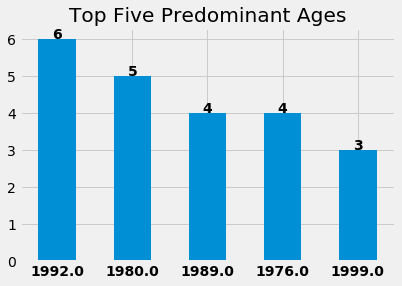

In [18]:
age.plot(kind='bar')
plt.xticks(rotation = 0, weight='bold')
plt.title("Top Five Predominant Ages")
for i, j in enumerate (age):
    plt.text(i, j, j, ha='center', weight='bold')

Text(0.5, 1.0, 'Top Five Predominant Ages')

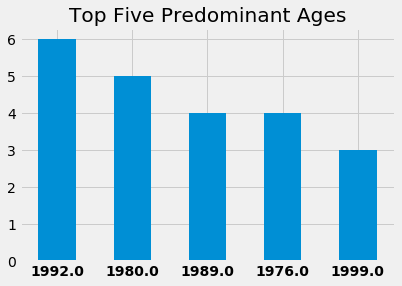

In [19]:
age.plot(kind='bar')
plt.xticks(rotation = 0, weight='bold')
plt.title("Top Five Predominant Ages")

In [20]:
bankss = df['bank_name'].value_counts()
bankss

ABank    32
GBank    32
QBank    32
KBank    31
Name: bank_name, dtype: int64

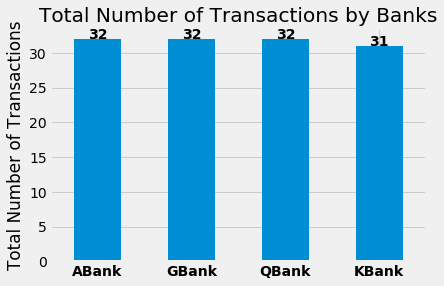

In [22]:
bankss.plot(kind='bar')
plt.ylabel("Total Number of Transactions")
plt.xticks(rotation = 0, weight='bold')
plt.title("Total Number of Transactions by Banks")
for i, j in enumerate (bankss):
    plt.text(i, j, j, ha='center', weight='bold')

In [23]:
channel = df['tx_channel'].value_counts()
channel

mobile    64
web       63
Name: tx_channel, dtype: int64

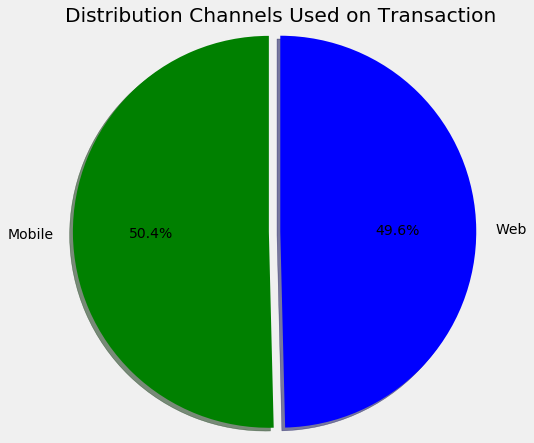

In [25]:
plt.figure(figsize=(12, 7))
color=('green', 'blue')
plt.pie(channel, data = df, explode=[0.07, 0], labels=("Mobile", "Web"), autopct="%1.1f%%", colors=color, shadow=True, 
        startangle=90, radius=1.2)
plt.title("Distribution Channels Used on Transaction", loc='center')
plt.show()